In [6]:
!pip install antspyx
!pip install SimpleITK


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 10.3 MB/s eta 0:00:00


In [16]:
%matplotlib inline

import os
# from helpers import *
import ants

import SimpleITK as sitk

print(f'AntsPy version = {ants.__version__}')
print(f'SimpleITK version = {sitk.__version__}')

ModuleNotFoundError: No module named 'helpers'

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import os

BASE_DIR = "/content/drive/MyDrive/brain-tumordataset-from-openneuro"
print(f'project folder = {BASE_DIR}')

# Update the path to your specific image
raw_img_path = os.path.join(BASE_DIR, 'brain-lesion_T1w.nii.gz')
print(f'raw_img_path = {raw_img_path}')


project folder = /content/drive/MyDrive/brain-tumordataset-from-openneuro
raw_img_path = /content/drive/MyDrive/brain-tumordataset-from-openneuro/brain-lesion_T1w.nii.gz


In [10]:
raw_img_ants = ants.image_read(raw_img_path)

In [12]:
print(raw_img_ants)


ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (192, 192, 160)
	 Spacing    : (1.25, 1.25, 1.2)
	 Origin     : (98.1114, -149.1525, -129.5975)
	 Direction  : [-0.  0. -1.  0.  1.  0.  1.  0.  0.]



In [13]:
raw_img_ants_arr = raw_img_ants.numpy()

print(f'type = {type(raw_img_ants_arr)}')
print(f'shape = {raw_img_ants_arr.shape}')

type = <class 'numpy.ndarray'>
shape = (192, 192, 160)


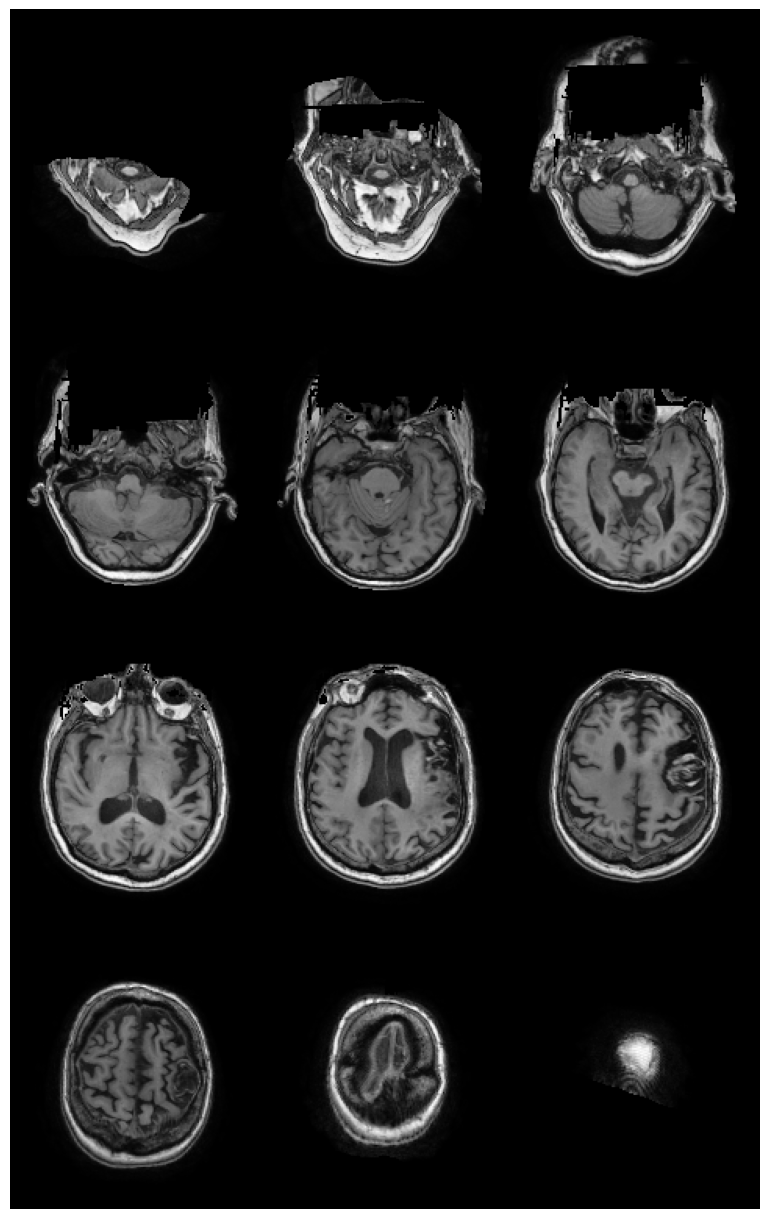

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_GenerativeAIImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_AltairImportHook.find_spec() not found; falling back to find_module()



In [14]:
ants.plot(raw_img_ants, figsize=3, axis=2)

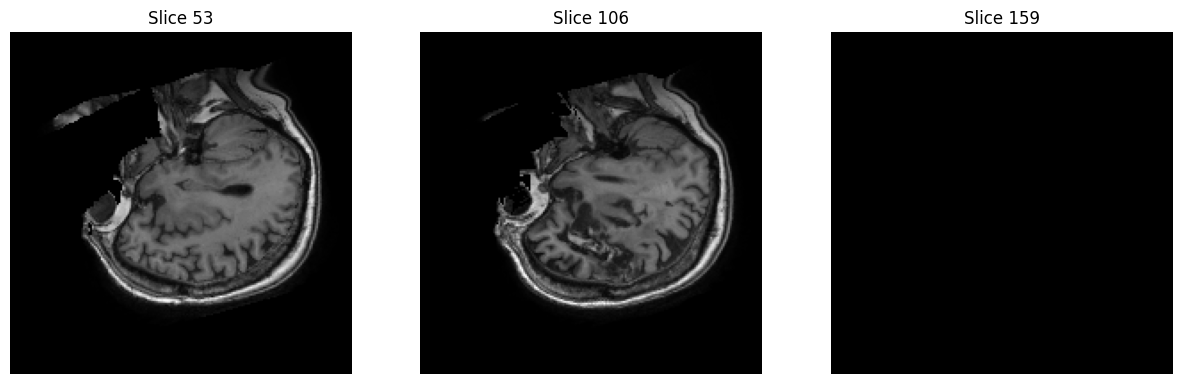

In [18]:
def explore_3D_array(array):
    # Simple visualization of 3 slices from the 3D array
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i, ax in enumerate(axes):
        ax.imshow(array[:, :, array.shape[2] // 3 * (i + 1)], cmap='gray')
        ax.set_title(f'Slice {array.shape[2] // 3 * (i + 1)}')
        ax.axis('off')
    plt.show()

# Now call the function with your image array
explore_3D_array(raw_img_ants_arr)


In [20]:
raw_img_sitk = sitk.ReadImage(raw_img_path, sitk.sitkFloat32)

In [21]:
print(raw_img_sitk)

Image (0x57e9d64e1ba0)
  RTTI typeinfo:   itk::Image<float, 3u>
  Reference Count: 1
  Modified Time: 1838
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 1812
  UpdateMTime: 1834
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [192, 192, 160]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [192, 192, 160]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [192, 192, 160]
  Spacing: [1.25, 1.25, 1.2]
  Origin: [98.1114, -149.153, -129.597]
  Direction: 
-0 0 -1
0 1 0
1 0 0

  IndexToPointMatrix: 
0 0 -1.2
0 1.25 0
1.25 0 0

  PointToIndexMatrix: 
0 0 0.8
0 0.8 0
-0.833333 0 0

  Inverse Direction: 
0 0 1
0 1 0
-1 0 0

  PixelContainer: 
    ImportImageContainer (0x57e9d5f997b0)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, float>
      Reference

In [23]:
# show_sitk_img_info(raw_img_sitk)

In [24]:
raw_img_sitk_arr = sitk.GetArrayFromImage(raw_img_sitk)

print(f'type = {type(raw_img_sitk_arr)}')
print(f'shape = {raw_img_sitk_arr.shape}')

type = <class 'numpy.ndarray'>
shape = (160, 192, 192)


In [28]:
def explore_3D_array(array):
    # Calculate the step size to get slices from the middle of the 3D array
    step_size = array.shape[2] // 4

    # Simple visualization of 3 slices from the 3D array
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i, ax in enumerate(axes):
        slice_index = step_size * (i + 1)
        ax.imshow(array[:, :, slice_index], cmap='gray')
        ax.set_title(f'Slice {slice_index}')
        ax.axis('off')
    plt.show()

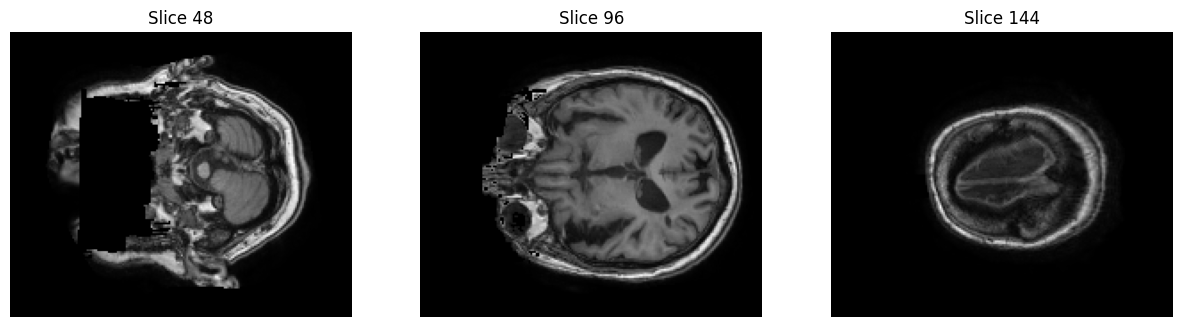

In [29]:
explore_3D_array(raw_img_sitk_arr)

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

def explore_3D_array(array):
    max_slices = array.shape[2]

    def plot_slice(slice_index):
        plt.figure(figsize=(10, 10))
        plt.imshow(array[:, :, slice_index], cmap='gray')
        plt.title(f'Slice {slice_index}')
        plt.axis('off')
        plt.show()

    interact(plot_slice, slice_index=widgets.IntSlider(min=0, max=max_slices-1, step=1, value=max_slices//2))

# Convert the SimpleITK image to a NumPy array
raw_img_sitk_arr = sitk.GetArrayFromImage(raw_img_sitk)

# Now call the function with your image array
explore_3D_array(raw_img_sitk_arr)


interactive(children=(IntSlider(value=96, description='slice_index', max=191), Output()), _dom_classes=('widge…